In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

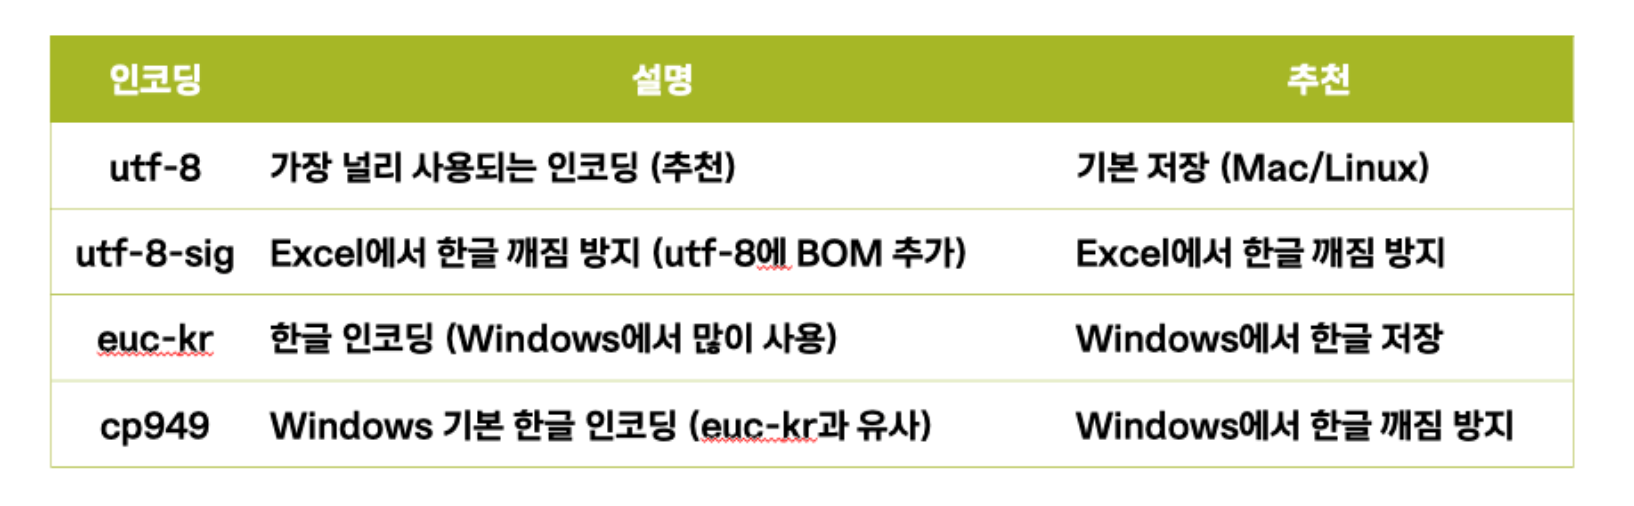

In [2]:
# 데이터 불러오기 mpg.csv
# encoding = utf8
mpg = pd.read_csv("./data/mpg.csv", encoding = "utf8")
# 모양
print(mpg.shape)
# 정보
print("\n", mpg.info())
# 결측치 확인
print("\n", mpg.isnull().sum())
# 기술통계
print("\n", mpg.describe())
# 문자열 자료 기술통계
print("\n", mpg.describe(include = 'object'))

(234, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  category      234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 20.2+ KB

 None

 manufacturer    0
model           0
displ           0
year            0
cyl             0
trans           0
drv             0
cty             0
hwy             0
fl              0
category        0
dtype: int64

             displ         year         cy

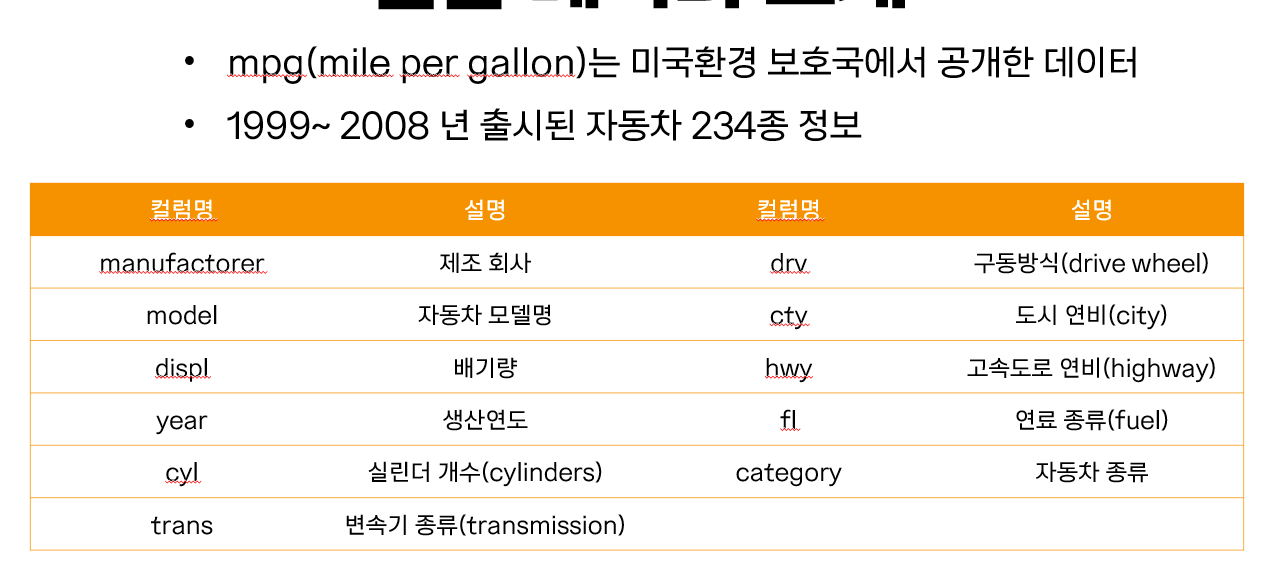

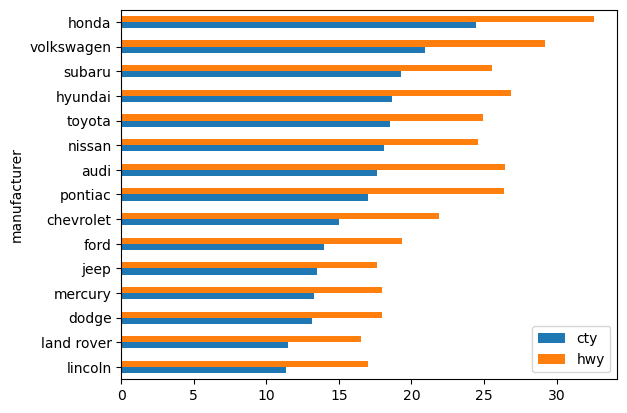

In [3]:
# 연비가 평균적으로 좋은 차 브랜드(제조사) 확인
# 제조사, 도시연비, 고속도로 연비
# 제조사 별로 평균 연비를 구해보자.

manu_df = mpg[['manufacturer', 'cty', 'hwy']].groupby('manufacturer').mean().sort_values(by = 'cty')
manu_df.plot(kind = 'barh')
plt.show()

In [4]:
# 두 번째로 연비가 좋은 폭스바겐 브랜드를 골라오자.
# volkswagen
# 1. 제조사가 volkswagen인 차 필터링.
target_data = mpg[mpg['manufacturer'] == 'volkswagen']

# 2. target_data 도시연비(cty)기준으로 내림차순 정렬, 상위 7개 가져오기
target_data.sort_values(by = 'cty', ascending = False).head(7)
# 연비 상위 7개 데이터를 보니 소형차종이 대부분 위치해 있음
# 연비 - 차종 사이의 관계를 파악해보자.

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
221,volkswagen,new beetle,1.9,1999,4,manual(m5),f,35,44,d,subcompact
212,volkswagen,jetta,1.9,1999,4,manual(m5),f,33,44,d,compact
222,volkswagen,new beetle,1.9,1999,4,auto(l4),f,29,41,d,subcompact
210,volkswagen,gti,2.0,2008,4,auto(s6),f,22,29,p,compact
215,volkswagen,jetta,2.0,2008,4,auto(s6),f,22,29,p,compact
217,volkswagen,jetta,2.5,2008,5,auto(s6),f,21,29,r,compact
209,volkswagen,gti,2.0,2008,4,manual(m6),f,21,29,p,compact


In [5]:
# 존체 데이터에서 차종, cty, hwy
# pivot_table, groupby 차종별 평균 연비 계산
mpg[['category', 'cty', 'hwy']].groupby(by = 'category').mean()
pd.pivot_table(data = mpg[['cty', 'hwy']], index = mpg['category'], aggfunc = 'mean')

,cty,hwy
category,,
2seater,15.400000,24.800000
compact,20.127660,28.297872
midsize,18.756098,27.292683
minivan,15.818182,22.363636
pickup,13.000000,16.878788
subcompact,20.371429,28.142857
suv,13.500000,18.129032


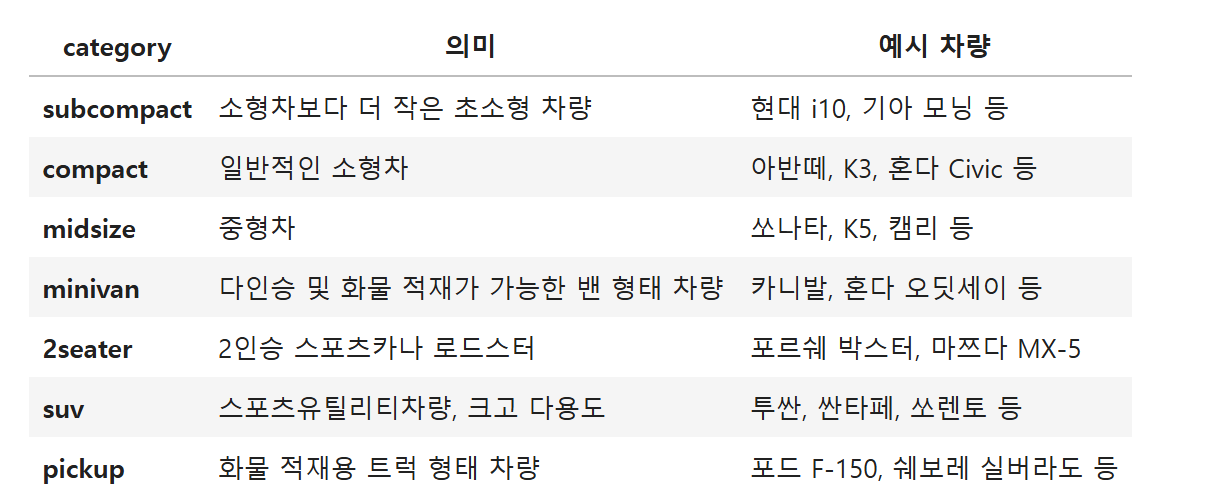

In [6]:
mpg[['category', 'cty']].groupby('category').agg(cty_mean = ('cty', 'mean')).sort_values(by = 'cty_mean', ascending = False)

,cty_mean
category,
subcompact,20.371429
compact,20.127660
midsize,18.756098
minivan,15.818182
2seater,15.400000
suv,13.500000
pickup,13.000000


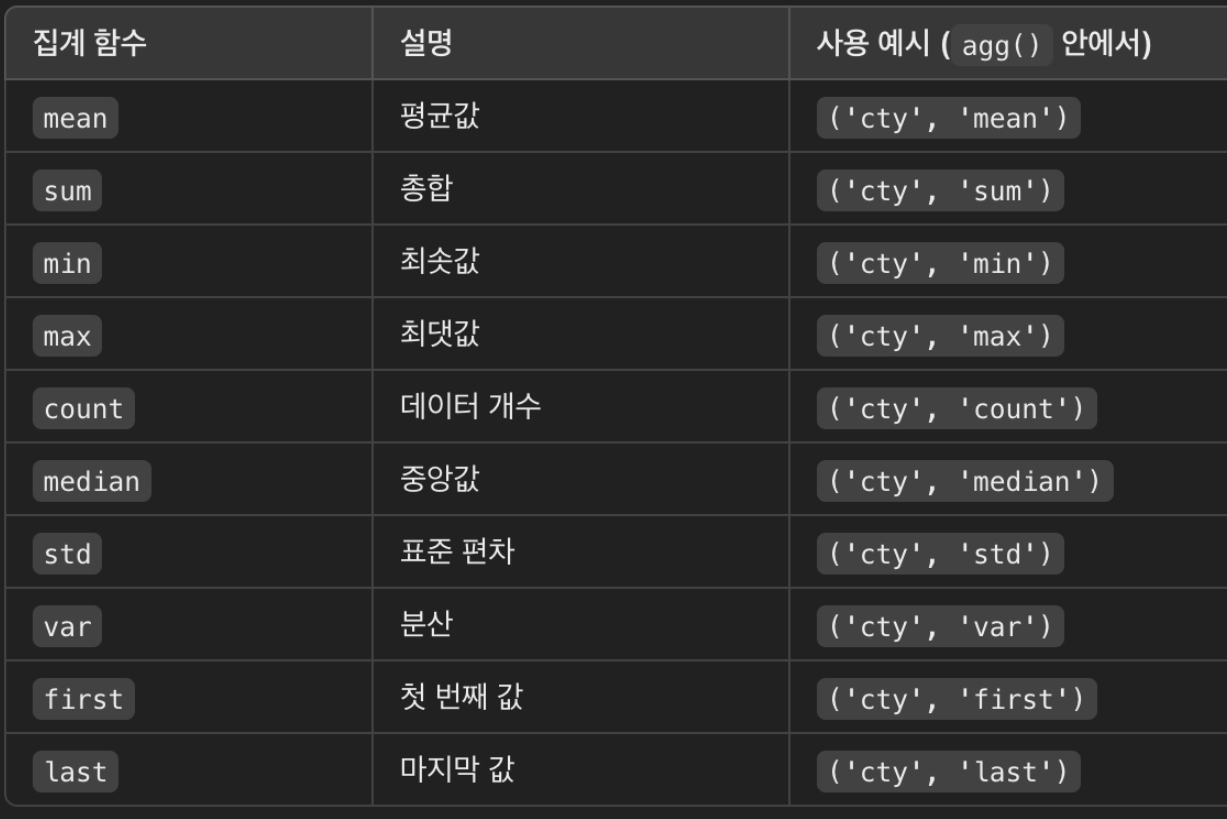

In [7]:
# 1. 제조사가 폭스바겐
target_data = mpg[(mpg['manufacturer'] == 'volkswagen')]
# 2. 차종이 subcompact거나 compact
target_data.loc[(target_data['category'] == 'subcompact') | (target_data['category'] == 'compact')]
target_data[target_data['category'].isin(['subcompact', 'compact'])]
result = target_data[target_data['category'].apply(lambda x : x in ('subcompact', 'compact'))]

In [8]:
print(result['model'].unique())

['gti' 'jetta' 'new beetle']


In [9]:
# 초소형, 소형자동차를 가장 많이 생산하는 제조사 파악
mpg[mpg['category'].apply(lambda x : x in ('subcompact', 'compact'))].groupby(by = ['manufacturer', 'category']).agg(cnt = ('model', 'count')).sort_values(by = 'cnt', ascending = False)

cnt
manufacturer category       
audi         compact      15
volkswagen   compact      14
toyota       compact      12
ford         subcompact    9
honda        subcompact    9
hyundai      subcompact    7
volkswagen   subcompact    6
subaru       compact       4
             subcompact    4
nissan       compact       2

### 결론
- 차 평균 연비가 가장 좋은 브랜드 : honda, volkswagen (나는 한국인이므로 volkswagen 선택)
- 차종 - 연비, 연비가 가장 좋은 차종 : subcompact, compact

> 1. 제조사 : volkswagen
> 2. 차종 : subcompact, compact
> 차 중에서 선택.

- 두 개 조건을 만족하는 차 중에서 연비가 제일 좋은 모델 3가지 'gti' 'jetta' 'new beetle'를 전시장에 가서 확인.

- 가서 차가 마음에 안 들 경우도 있기 때문에 폭 넓은 선택지를 위해 소형차를 가장 많이 가지고 있는 제조사인 audi에 두 번째로 방문.

In [20]:
isStopped = False
target_data = mpg

# 열 종류 출력
print("Attributes\n", mpg.columns)

# 검색
while True:
    # 검색할 열 선택
    while True:
        col = input("\nAttribute search or type 'end' to move on >>")
        if col in target_data.columns:
            print(col, "\n", target_data[col].unique())
            break
        elif col == "end":
            isStopped = True
            break
        else:
            print("No such attribute. Try again.")

    # 검색 종료
    if isStopped:
        break
    
    # 열 검색
    while True:
        src = input(f"\nSearch in {col} or type 'end' to return >>")
        # 취소
        if src == "end":
            break
        # 문자열 검색
        elif (target_data[col].dtype == object) and (target_data[col].str.contains(src).sum()):
            target_data = target_data[target_data[col].str.contains(src)]
            print(f"Successfully searched.\n{col} : {src}")
            break
        # 정수형 검색
        elif (target_data[col].dtype == int) and (target_data[col].isin([int(src)]).sum()):
            target_data = target_data[target_data[col].isin([int(src)])]
            print(f"Successfully searched.\n{col} : {src}")
            break
        # 실수형 검색
        elif (target_data[col].dtype == float) and (target_data[col].isin([float(src)]).sum()):
            target_data = target_data[target_data[col].isin([float(src)])]
            print(f"Successfully searched.\n{col} : {src}")
            break
        # 없는 값
        else:
            print("Data not found. Try again.")

# 정렬
while True:
    src = input("\nSort by >>")
    if src in target_data.columns:
        break
    else:
        print("No such attribute. Try again.")

# 출력
target_data.sort_values(src, ascending = False)

Attributes
 Index(['manufacturer', 'model', 'displ', 'year', 'cyl', 'trans', 'drv', 'cty',
       'hwy', 'fl', 'category'],
      dtype='object')



Attribute search or type 'end' to move on >> year


year 
 [1999 2008]



Search in year or type 'end' to return >> 2008


Successfully searched.
year : 2008



Attribute search or type 'end' to move on >> category


category 
 ['compact' 'midsize' 'suv' '2seater' 'minivan' 'pickup' 'subcompact']



Search in category or type 'end' to return >> pickup


Successfully searched.
category : pickup



Attribute search or type 'end' to move on >> end

Sort by >> displ


,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
72,dodge,ram 1500 pickup 4wd,5.7,2008,8,auto(l5),4,13,17,r,pickup
89,ford,f150 pickup 4wd,5.4,2008,8,auto(l4),4,13,17,r,pickup
69,dodge,ram 1500 pickup 4wd,4.7,2008,8,manual(m6),4,9,12,e,pickup
52,dodge,dakota pickup 4wd,4.7,2008,8,auto(l5),4,14,19,r,pickup
53,dodge,dakota pickup 4wd,4.7,2008,8,auto(l5),4,14,19,r,pickup
66,dodge,ram 1500 pickup 4wd,4.7,2008,8,auto(l5),4,13,17,r,pickup
65,dodge,ram 1500 pickup 4wd,4.7,2008,8,auto(l5),4,9,12,e,pickup
54,dodge,dakota pickup 4wd,4.7,2008,8,auto(l5),4,9,12,e,pickup
64,dodge,ram 1500 pickup 4wd,4.7,2008,8,manual(m6),4,12,16,r,pickup
68,dodge,ram 1500 pickup 4wd,4.7,2008,8,manual(m6),4,12,16,r,pickup
